# Task 1 NLP基本任务

## 前置知识

1. **序列建模与循环神经网络 :**
  - **[RNN](./RNN.pdf) 核心思想:** 理解RNN如何通过循环结构处理序列数据，并认识到其存在的问题。  

  当前隐藏状态由当前输入与上一层隐藏状态共同形成。  
  反向传播时链式法则过长可能导致梯度消失或爆炸，即遗忘早期序列。  
  无法并行计算。

  - **LSTM / GRU:** 理解LSTM（长短期记忆网络）和GRU（门控循环单元）。
  
### [GRU](http://zh.gluon.ai/chapter_recurrent-neural-networks/gru.html)

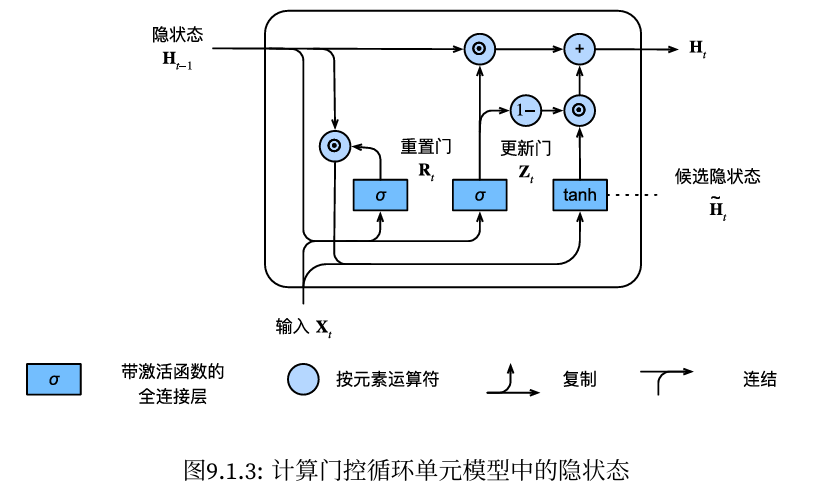  
重置门$R_t$
$$\mathbf{R}_t=\sigma\left(\mathbf{X}_t \mathbf{W}_{x r}+\mathbf{H}_{t-1} \mathbf{W}_{h r}+\mathbf{b}_r\right)$$

- $\mathbf{X}_t$: (batch_size，d_embed)
- $\mathbf{W}_{x r}$: (d_embed，d_hidden)
- $\mathbf{H}_{t-1}$: (batch_size，d_hidden)
- $\mathbf{W}_{h r}$: (d_hidden，d_hidden)
- $\mathbf{R}_t$: (batch_size，d_hidden)
- $\mathbf{b}_r$: (d_hidden,)

重置门确定候选隐藏状态$\tilde{\mathbf{H}}_t$
$$\tilde{\mathbf{H}}_t=\tanh \left(\mathbf{X}_t \mathbf{W}_{x h}+\left(\mathbf{R}_t \odot \mathbf{H}_{t-1}\right) \mathbf{W}_{h h}+\mathbf{b}_h\right)$$

- $\left(\mathbf{R}_t \odot \mathbf{H}_{t-1}\right)$: 逐元素相乘  

$R_t$在这里决定了重置历史记忆的程度。

更新门$Z_t$
$$\mathbf{Z}_t=\sigma\left(\mathbf{X}_t \mathbf{W}_{x z}+\mathbf{H}_{t-1} \mathbf{W}_{h z}+\mathbf{b}_z\right)$$

更新门确定最终隐藏状态$H_t$
$$\mathbf{H}_t=\mathbf{Z}_t \odot \mathbf{H}_{t-1}+\left(1-\mathbf{Z}_t\right) \odot \tilde{\mathbf{H}}_t$$

$Z_t$在这里决定了用新候选覆盖旧状态的程度

使用重置门计算出“新状态”，再由更新门综合。

重置门有助于捕获序列中的短期依赖关系；更新门有助于捕获序列中的长期依赖关系。

----

$$
\sigma(x)=\frac{1}{1+e^{-x}}\in (0,1)
$$

$$
\tanh (x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}\in (-1,1)
$$

----

### [LSTM](http://zh.gluon.ai/chapter_recurrent-neural-networks/lstm.html)

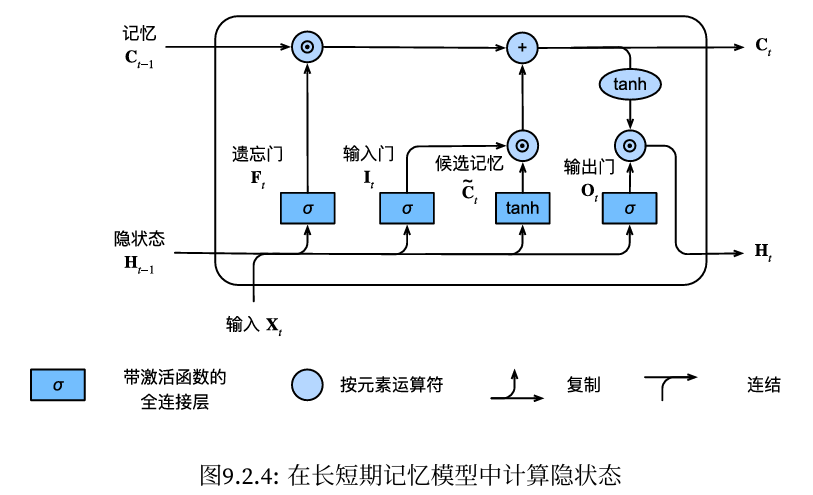  
输入门、遗忘门、输出门：
$$
\begin{aligned}
\mathbf{I}_t & =\sigma\left(\mathbf{X}_t \mathbf{W}_{x i}+\mathbf{H}_{t-1} \mathbf{W}_{h i}+\mathbf{b}_i\right), \\
\mathbf{F}_t & =\sigma\left(\mathbf{X}_t \mathbf{W}_{x f}+\mathbf{H}_{t-1} \mathbf{W}_{h f}+\mathbf{b}_f\right), \\
\mathbf{O}_t & =\sigma\left(\mathbf{X}_t \mathbf{W}_{x o}+\mathbf{H}_{t-1} \mathbf{W}_{h o}+\mathbf{b}_o\right),
\end{aligned}
$$

候选记忆元
$$
\tilde{\mathbf{C}}_t=\tanh \left(\mathbf{X}_t \mathbf{W}_{x c}+\mathbf{H}_{t-1} \mathbf{W}_{h c}+\mathbf{b}_c\right),
$$

记忆元
$$
\mathbf{C}_t=\mathbf{F}_t \odot \mathbf{C}_{t-1}+\mathbf{I}_t \odot \tilde{\mathbf{C}}_t
$$

隐状态
$$
\mathbf{H}_t=\mathbf{O}_t \odot \tanh \left(\mathbf{C}_t\right)
$$

> 分离记忆与输出。

----

2. **常见的评估指标:**

- Confusion Matrix:

||预测为正例|预测为负例|
| --- | --- |---|
|**实际为正例**|TP真阳性|FN假阴性|
|**实际为负例**|FP假阳性|TN真阴性|

准确率：
$$\text { Accuracy }=\frac{TP+TN}{TP+FP+FN+TN}$$

精确率：预测正例中正确率
$$\text { Precision }=\frac{T P}{T P+F P}$$

召回率：实际正例中检出率
$$\text { Recall }=\frac{T P}{T P+F N}$$

F1-Score：平衡Precision和Recall
$$F 1=2 \times \frac{\text { Precision } \times \text { Recall }}{\text { Precision }+ \text { Recall }}=\frac{2 T P}{2 T P+F P+F N}$$


## 数据集说明

- 来源：ModelScope [数据集](https://www.modelscope.cn/datasets/chqingMS/game_chat)`chqingMS/game_chat`，包含游戏场景中的用户聊天文本及标签。结构：数据集分为训练集和验证集，每条数据包含`sentence`（聊天文本）和`label`（类别标签）。
- 任务：根据聊天文本预测其对应的类别标签（多分类任务）。

### 示例代码

In [ ]:
#数据集下载
from modelscope.msdatasets import MsDataset
ds =  MsDataset.load('chqingMS/game_chat')
#您可按需配置 subset_name、split，参照“快速使用”示例代码

In [ ]:
from modelscope.msdatasets import MsDataset
ds = MsDataset.load('chqingMS/game_chat')

# Dataset 对象是 ModelScope 和 HuggingFace 等 NLP 框架中常用的数据结构。

print(ds['train'])
print(ds['train'][0])
labels = [x['label'] for x in ds['train']]
unique_labels = set(labels)
print(unique_labels)

print()

print(ds['validation'])
print(ds['validation'][0])
labels = [x['label'] for x in ds['validation']]
unique_labels = set(labels)
print(unique_labels)

# validation 所含标签与 train 相同。

Dataset({
    features: ['sentence', 'label', 'idx'],
    num_rows: 2378
})
{'sentence': '浩出不', 'label': '买卖账号', 'idx': '0'}
{'辱骂', '拉人', '色情', '买卖账号', '正常'}

Dataset({
    features: ['sentence', 'label', 'idx'],
    num_rows: 2382
})
{'sentence': '你这   呺考  虑  出吗', 'label': '买卖账号', 'idx': '0'}
{'辱骂', '拉人', '色情', '买卖账号', '正常'}


## 实践任务

使用 PyTorch框架构建 LSTM模型，对`chqingMS/game_chat`数据集的游戏聊天文本进行分类，根据聊天内容预测其所属类别。通过完整的文本处理、模型训练与多维度评估，掌握序列分类的核心流程，并基于评估结果分析模型性能瓶颈。

In [ ]:
import re  # 正则表达式模块（regular expression）

def tokenize(text):
# r'\w+' 是一个正则表达式，匹配连续的字符片段，不匹配空格标点等
    return re.findall(r'\w+', str(text).lower())


test = ["hello", "Hello,  world!", "Hey, there! you!"]
print(tokenize(test[1]))

# 构建词表（vocab），把唯一单词映射为唯一整数编号。
vocab = {w: i+1 for i, w in enumerate(set(t for s in test for t in tokenize(s)))}
vocab['<PAD>'] = 0  # 填充符号
print(vocab)

def encode(text, seq_len=2):
    ids = [vocab.get(w, 0) for w in tokenize(text)] # 查找单词编号，没有则0
    ids = (ids + [0]*seq_len)[:seq_len]  # 统一长度
    return ids

print(encode(test[0]))
print(encode("hey, what happens?"))

['hello', 'world']
{'you': 1, 'world': 2, 'there': 3, 'hey': 4, 'hello': 5, '<PAD>': 0}
[5, 0]
[4, 0]


----

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import re
from sklearn.metrics import classification_report


from modelscope.msdatasets import MsDataset
ds = MsDataset.load('chqingMS/game_chat')
train_data = pd.DataFrame([x for x in ds['train']])  # Dataset 对象不是标准的列表或字典结构。
val_data = pd.DataFrame([x for x in ds['validation']])
train_labels = train_data['label'].tolist()
val_labels = val_data['label'].tolist()
train_texts = train_data['sentence'].tolist()
val_texts = val_data['sentence'].tolist()


def tokenize(text):
    return re.findall(r'\w+', str(text).lower())

vocab = {w: i+1 for i, w in enumerate(set(t for s in train_texts for t in tokenize(s)))}
vocab['<PAD>'] = 0
print(len(vocab))

def encode(text, seq_len=20):
    ids = [vocab.get(w, 0) for w in tokenize(text)]
    ids = (ids + [0]*seq_len)[:seq_len]
    return ids

label2id = {l: i for i, l in enumerate(sorted(set(train_labels)))}
train_X = [encode(s) for s in train_texts]
train_y = [label2id[l] for l in train_labels]
val_X = [encode(s) for s in val_texts]
val_y = [label2id[l] for l in val_labels]


class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X, self.y = torch.LongTensor(X), torch.LongTensor(y)
    def __len__(self): return len(self.y)
    def __getitem__(self, i): return self.X[i], self.y[i]
# PyTorch 的数据加载器（DataLoader），用于把训练数据分批（batch）送入模型训练。
# 只要自定义类中实现了 __len__ 和 __getitem__ 方法，就可以被 DataLoader 正常批量读取和迭代。
train_loader = DataLoader(MyDataset(train_X, train_y), batch_size=32, shuffle=True) # 每个 epoch 都打乱数据顺序
val_loader = DataLoader(MyDataset(val_X, val_y), batch_size=32, shuffle=False)


class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, class_num):
        super().__init__()
        d_embed = 64
        d_hidden = 64
        self.embed = nn.Embedding(vocab_size, d_embed, padding_idx=0)
        # 输入张量的第一个维度是batch ([batch, seq_len, d_embed])
        self.lstm = nn.LSTM(d_embed, d_hidden, batch_first=True) 
        self.fc = nn.Linear(d_hidden, class_num)
        
    def forward(self, x):
        x = self.embed(x)
        # 返回：output: [batch, seq_len, d_hidden] 每个时间步的隐藏状态序列。
        # 返回：(h, c)：最后一步的隐藏状态（h）和细胞状态（c）
        # h：[num_layers, batch, d_hidden]   num_layers: 堆叠的LSTM层数
        _, (h, _) = self.lstm(x)
        return self.fc(h[-1])  # [batch, d_hidden]

device = torch.device('cuda')
model = LSTMClassifier(len(vocab), len(label2id)).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) # 优化所有参数
loss_fn = nn.CrossEntropyLoss()

for epoch in range(5):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)  # 自动执行 model.forward(xb)
        loss = loss_fn(out, yb)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1} finished.')


model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for xb, yb in val_loader:
        xb, yb = xb.to(device), yb.to(device)
        pred = model(xb).argmax(1)
        y_true.extend(yb.cpu().numpy())
        y_pred.extend(pred.cpu().numpy())

# classification_report 是 sklearn.metrics 提供的函数，用于生成详细的分类结果统计表。
print(classification_report(y_true, y_pred, target_names=label2id.keys()))


3637
Epoch 1 finished.
Epoch 2 finished.
Epoch 3 finished.
Epoch 4 finished.
Epoch 5 finished.
              precision    recall  f1-score   support

        买卖账号       0.53      0.94      0.67      1160
          拉人       0.52      0.28      0.37       584
          正常       1.00      0.00      0.00       625
          色情       0.00      0.00      0.00         4
          辱骂       0.00      0.00      0.00         9

    accuracy                           0.53      2382
   macro avg       0.41      0.24      0.21      2382
weighted avg       0.65      0.53      0.42      2382



d:\anaconda\envs\concuda\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\anaconda\envs\concuda\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\anaconda\envs\concuda\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### 评估

macro avg: 宏平均，对每个类别分别计算指标，然后取平均值。

“色情”、“辱骂”类样本极少，完全无法正确分辨。模型倾向于预测为多数类别，即“买卖账号”。

解决方法：对少样本过采样/对多样本欠采样；扩充样本；调整阈值。